In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MIROC5/miroc5_pr_197001-200512.nc')

data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) object 1970-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:34:28 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [3]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data


/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_20002/3137857967.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1970-01-01 00:00:00 ... 2006-01-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:34:28 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [4]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2005-12-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:34:28 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-06-01 00:00:00 ... 2005-10-01 00:00:00
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:34:28 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [6]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [7]:
#data["pr"]["y"][287:337].values

In [8]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[7.6749595e-05, 6.9291280e-05, 7.1032591e-05, ..., 7.2830553e-05,
        7.3529533e-05, 8.0528669e-05],
       [6.3921216e-05, 5.2208117e-05, 5.3857486e-05, ..., 5.7782305e-05,
        5.7935980e-05, 7.0116126e-05],
       [6.4872867e-05, 5.3671210e-05, 4.8273741e-05, ..., 5.2248761e-05,
        5.4442462e-05, 6.3763073e-05],
       ...,
       [5.2325160e-04, 2.7817948e-04, 1.8049614e-04, ..., 3.0249049e-04,
        3.7932425e-04, 5.7904865e-04],
       [5.6253461e-04, 2.8644028e-04, 2.0517159e-04, ..., 3.7410238e-04,
        4.1052655e-04, 5.8400078e-04],
       [6.0286216e-04, 4.3610085e-04, 2.6865143e-04, ..., 5.3082750e-04,
        5.5424089e-04, 6.5344502e-04]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [10]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[ 6.631165  ,  5.98676659,  6.13721588, ...,  6.29255979,
         6.35295161,  6.95767701],
       [ 5.52279304,  4.51078133,  4.65328678, ...,  4.99239113,
         5.0056687 ,  6.0580333 ],
       [ 5.60501574,  4.63719259,  4.17085126, ...,  4.51429293,
         4.70382872,  5.50912949],
       ...,
       [45.20893805, 24.03470669, 15.59486613, ..., 26.1351781 ,
        32.77361523, 50.02980307],
       [48.60299025, 24.74843999, 17.72682499, ..., 32.32244588,
        35.46949429, 50.45766737],
       [52.0872904 , 37.67911317, 23.21148394, ..., 45.86349595,
        47.88641296, 56.45764992]])
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

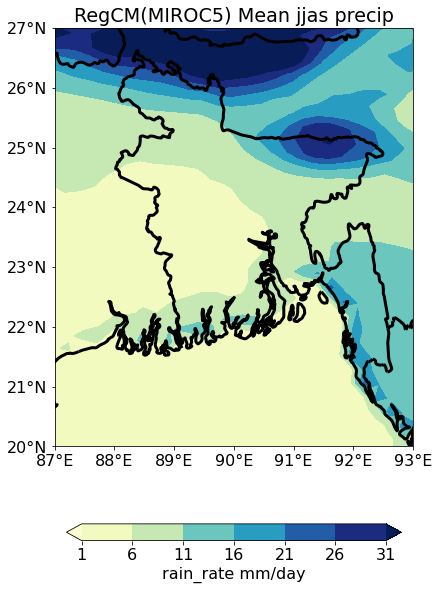

In [11]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('RegCM(MIROC5) Mean jjas precip')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_miroc5_jjas_mean.png")




Now I will plot the annual precipitation rate in mm/day

In [12]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[3.6545566e-04, 3.1891727e-04, 3.0917572e-04, ..., 4.0927720e-05,
        4.2301232e-05, 4.6950448e-05],
       [3.0164080e-04, 2.2870346e-04, 2.2794043e-04, ..., 3.3691518e-05,
        3.4470297e-05, 4.1999218e-05],
       [3.0456917e-04, 2.4511857e-04, 2.1743537e-04, ..., 3.1460462e-05,
        3.2898079e-05, 3.9858038e-05],
       ...,
       [3.5225626e-04, 2.0611832e-04, 1.6748358e-04, ..., 1.2410499e-04,
        1.5497087e-04, 2.3711151e-04],
       [3.6826753e-04, 2.1018118e-04, 1.8417805e-04, ..., 1.5129038e-04,
        1.6574547e-04, 2.3772701e-04],
       [3.9714502e-04, 3.0008587e-04, 2.2544735e-04, ..., 2.1339898e-04,
        2.2413782e-04, 2.6829439e-04]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

In [13]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[31.57536937, 27.55445223, 26.71278259, ...,  3.536155  ,
         3.65482641,  4.05651875],
       [26.0617652 , 19.75997882, 19.69405306, ...,  2.91094717,
         2.97823363,  3.62873239],
       [26.3147763 , 21.17824461, 18.78641616, ...,  2.71818393,
         2.84239399,  3.44373446],
       ...,
       [30.43494103, 17.80862273, 14.47058134, ..., 10.72267117,
        13.38948305, 20.4864346 ],
       [31.81831464, 18.15965432, 15.91298324, ..., 13.07148915,
        14.32040865, 20.539614  ],
       [34.31332977, 25.92741922, 19.47865114, ..., 18.43767157,
        19.36550802, 23.18063518]])
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

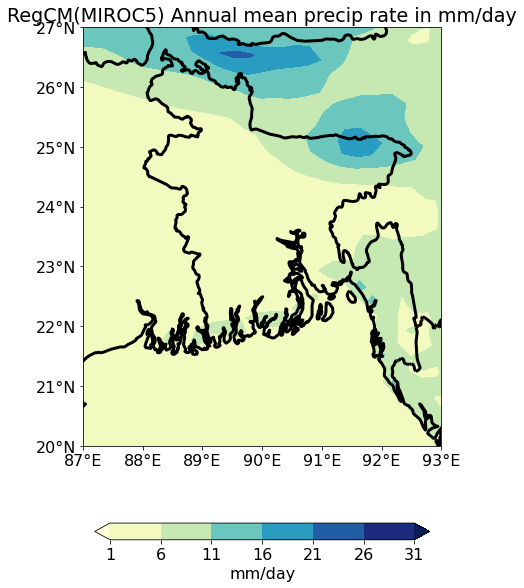

In [15]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

#plt.title('RegCM(MIROC5) Annual mean precip rate in mm/day',fontweight='bold', fontsize=15)

plt.title('RegCM(MIROC5) Annual mean precip rate in mm/day')


plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_miroc5_annual_mean.png")




